In [1]:
from IPython.display import Image
%matplotlib inline

## Choosing a classification algorithm

---

#### First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower examples. The classes are already converted to integer labels where 

- `0=Iris-Setosa`, 
- `1=Iris-Versicolor`,
- `2=Iris-Virginica`.

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [6]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- Splitting data into 70% training and 30% test data:

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [9]:
X_train.shape, y_train.shape

((105, 2), (105,))

In [10]:
X_test.shape, y_test.shape

((45, 2), (45,))

In [24]:
print(X_train.mean(), X_train.var())

2.4933333333333327 3.5784317460317463


`stratification` means that the `train_test_split` method returns training and test subsets that have the same proportions of class labels as the input dataset. We can use NumPy’s bincount function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [11]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


- feature scaling for optimal performance


In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
print(X_train_std.mean(), X_train_std.var())

1.0150610510858574e-16 0.9999999999999998


### Training a perceptron via scikit-learn

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
# train the model
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

- make predictions via the `predict` method.

In [26]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


- classifier’s prediction accuracy combines the predict call with accuracy_score

In [28]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [29]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')  

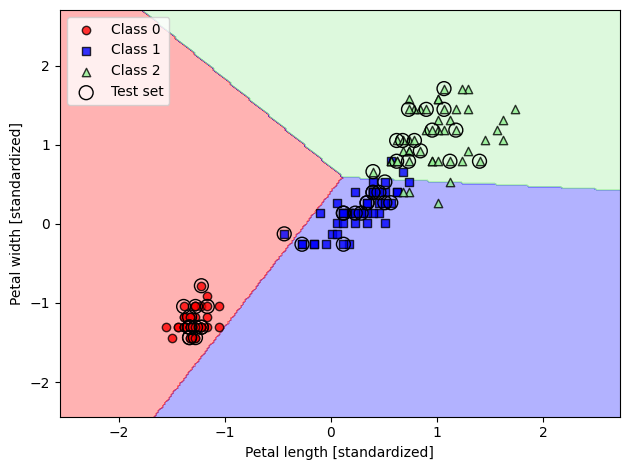

In [30]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

## Modeling class probabilities via logistic regression

---

#### Logistic regression intuition and conditional probabilities

`Logistic regression` is a classification model that is very easy to implement and performs very well on linearly separable classes. It is one of the most widely used algorithms for classification in industry. Similar to the perceptron and Adaline, the logistic regression model is also a linear model for `binary classification`.

Log odds is the logarithm of the odds of an event occurring. It is a mathematical transformation that maps a probability, which is restricted to a range between 0 and 1, to a continuous scale from negative infinity to positive infinity. 

#### How to calculate log odds
The calculation involves three steps:

- Calculate the probability $(p)$ of an event happening.

- Calculate the odds, which is the ratio of the probability of success to the probability of failure:$(Odds=\frac{p}{1-p})$

- Take the logarithm of the odds to find the log odds, also known as the logit:$(Log\ odds=\log (\frac{p}{1-p}))$


The natural logarithm (base $e$) is typically used for this calculation.



**Example calculation**

If the probability $(p)$ of a horse winning a race is `0.20`: 

- Probability of winning: $(p=0.20)$.

- Odds of winning: $(Odds=\frac{0.20}{1-0.20}=\frac{0.20}{0.80}=0.25)$.

- Log odds: $(Log\ odds=\ln (0.25)\approx -1.386)$.



**Why log odds are used**

Log odds are commonly used in statistics and machine learning, particularly in logistic regression, because they offer several advantages over probabilities:

- `Unbounded range`: Unlike probabilities `(0 to 1)`, log odds can take any real number value, from negative to positive infinity. This makes them suitable for use in linear models, where the output can have an unrestricted range.

- `Symmetry`: The scale of probabilities is not symmetric; a change from `0.5` to `0.75` is different from a change from `0.75` to `1.0`. Log odds, however, are symmetric around 0, making them easier to analyze.

- `Linear relationship`: In logistic regression, log odds have a linear relationship with the predictor variables, which simplifies the modeling process. For example, a one-unit increase in a predictor variable results in a constant increase in the log odds, making interpretation straightforward.

- `Numerical stability`: When probabilities are very close to `0` or `1`, they can become numerically difficult to work with. The log-odds transformation maps these extreme values to a finite, manageable range, improving computational stability. 

This inverse of the logit function is typically called the `logistic sigmoid function`, which is sometimes simply abbreviated to `sigmoid function` due to its characteristic S-shape.

- let’s simply plot the sigmoid function for some values in the range –7 to 7.

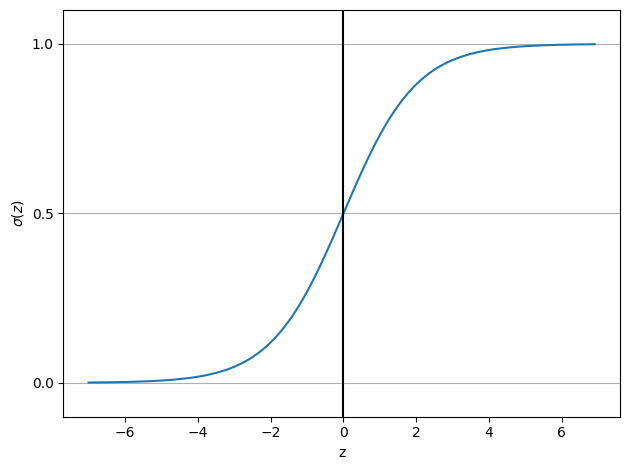

In [34]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('figures/03_02.png', dpi=300)
plt.show()

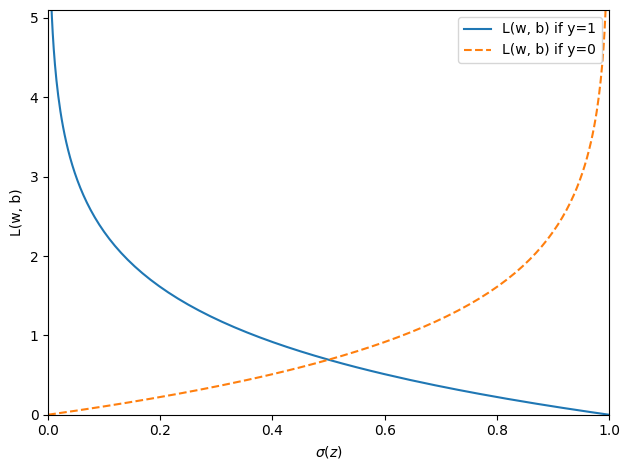

In [35]:
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_04.png', dpi=300)
plt.show()

In [36]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter: int = 50, random_state: int =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X: np.array, y: np.array):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

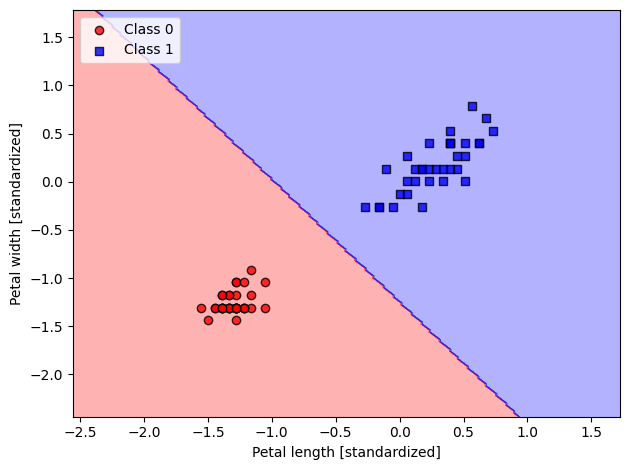

In [41]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Training a logistic regression model with scikit-learn

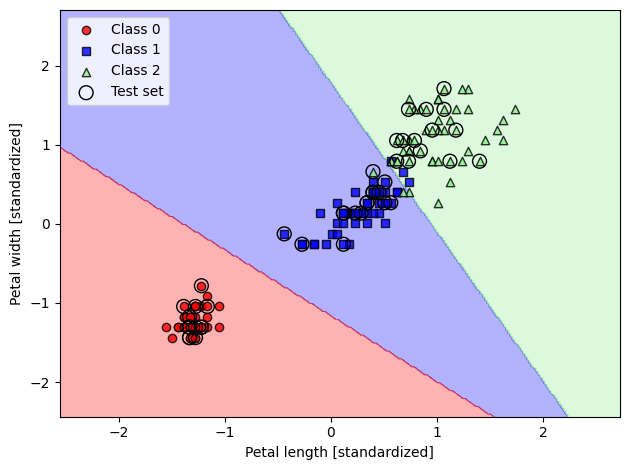

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,
                        solver='lbfgs')

lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()

In [43]:
lr.predict_proba(X_test_std[:3, :])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [44]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [45]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [47]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [48]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

### Tackling overfitting via regularization

`High bias` in machine learning occurs when a model is too simple and makes strong assumptions, leading to underfitting and poor performance on both training and test data by failing to capture complex patterns. 

`High variance` happens when a model is overly complex and sensitive to the training data, leading to overfitting and excellent performance on training data but poor generalization to new, unseen data. 

Addressing high bias requires increasing model complexity, while reducing high variance involves decreasing complexity, adding regularization, or using more data.  

The `Bias-Variance Tradeoff` is the concept that increasing a machine learning model's complexity reduces its bias (error from incorrect assumptions, leading to underfitting) while increasing its variance (error from sensitivity to training data, leading to overfitting), forcing a balance to achieve good performance on new data. The goal is to find a sweet spot where neither bias nor variance is too high, resulting in a model that is neither too simple nor too complex for the data it's learning from. 


In the context of machine learning models, `variance` measures the consistency (or variability) of the model prediction for classifying a particular example if we retrain the model multiple times, for example, on different subsets of the training dataset. We can say that the model is sensitive to the randomness in the training data. 

In contrast, `bias` measures how far off the predictions are from the correct values in general if we rebuild the model
multiple times on different training datasets; bias is the measure of the systematic error that is not due to randomness.

One way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization. Regularization is a very useful method for handling collinearity (high correlation among features), filtering out noise from data, and eventually preventing overfitting.


`Regularization` is a set of techniques that reduce overfitting by adding a penalty to the model's complexity during training, ensuring it performs well on both new and existing data. It prevents models from learning too much from the noisy patterns in training data by modifying the loss function to discourage overly large model parameters. Key regularization methods include `L1 (Lasso) regularization`, which promotes sparsity by shrinking some coefficients to zero, and `L2 (Ridge) regularization`, which shrinks all coefficients towards zero, and `Elastic Net`, a combination of both. 


**Why Regularization is Needed**

- `Overfitting:` Models can become too complex and memorize the training data, including its noise, leading to poor performance on new, unseen data. 

- `Generalization:` Regularization helps the model generalize better by learning the underlying patterns in the data rather than the specific noise. 


**How it Works**

- `Penalty Term:` Regularization adds a "penalty term" to the model's original loss function.

- `Complexity Control:` This penalty is a function of the model's parameters (like coefficients).

- `Balancing Act:` The goal is to find a balance between minimizing the loss (fitting the training data) and keeping the model's complexity (controlled by the penalty) low.

Via the regularization parameter, $\lambda$, we can control how closely we fit the training data, while keeping the weights small. By increasing the value of $\lambda$, we increase the regularization strength. Note that the bias unit, which is essentially an intercept term or negative threshold, is usually not regularized.

`Regularization` in scikit-learn's LogisticRegression is performed by controlling the `penalty` and `C` parameters.


**1. penalty parameter:**

- This parameter specifies the type of regularization to apply.

- `'l1' (Lasso Regularization):` Adds a penalty proportional to the absolute value of the coefficients. This can lead to sparse models where some coefficients are driven to exactly zero, effectively performing feature selection.

- `'l2' (Ridge Regularization):` Adds a penalty proportional to the square of the coefficients. This helps to shrink the coefficients towards zero, reducing their magnitude and preventing overfitting, but typically does not set them to exactly zero. This is the default.

- `'elasticnet':` A combination of `L1` and `L2` regularization. It requires specifying the `l1_ratio` parameter to control the mix between `L1` and `L2` penalties.

- `'none':` No regularization is applied.



**2. C parameter:** (Condition apply differently for LogisticRegression and Support Vector Machines)

- This parameter controls the inverse of the regularization strength.

- Smaller values of `C` correspond to stronger regularization (more penalty), leading to simpler models.

- Larger values of `C` correspond to weaker regularization (less penalty), allowing for more complex models that might overfit.

- The default value is 1.0.

In [ ]:
# Deprecated (Don't Run this code)
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#plt.savefig('figures/03_08.png', dpi=300)
plt.show()

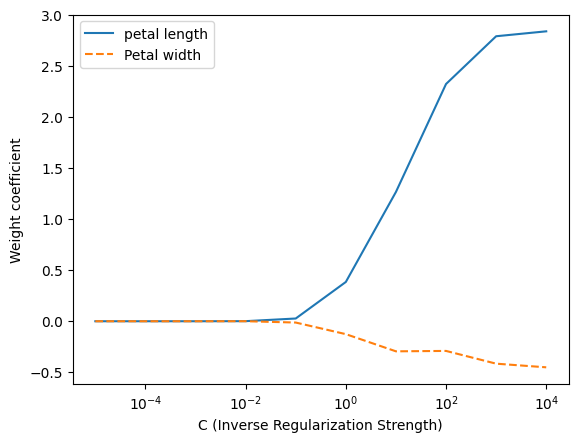

In [66]:
from sklearn.multiclass import OneVsRestClassifier

weights, params = [], []

# Loop through range of C values (inverse of regularization strength)
for c in np.arange(-5, 5):
    C_value = 10.0 ** c
    # Wrap logistic regression in OneVsRestClassifier
    lr = OneVsRestClassifier(LogisticRegression(C=C_value, solver='lbfgs', max_iter=1000))
    
    lr.fit(X_train_std, y_train)
    
    # Each classifier in OneVsRestClassifier corresponds to one class vs rest
    # Use the first estimator’s coefficients for illustration (or average if multiclass)
    coef = np.mean([est.coef_.ravel() for est in lr.estimators_], axis=0)
    
    weights.append(coef)
    params.append(C_value)

weights = np.array(weights)

# Plot weight coefficients against C
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C (Inverse Regularization Strength)')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### Maximum margin classification with support vector machines

Another powerful and widely used learning algorithm is the `support vector machine (SVM)`, which can be considered an extension of the perceptron. Using the perceptron algorithm, we minimized misclassification errors. However, in SVMs, our optimization objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane `(decision boundary)` and the training examples that are closest to this hyperplane, which are the so-called `support vectors`.


A `Support Vector Machine (SVM)` is a supervised machine learning algorithm used for classification and regression tasks, including outlier detection. It works by finding an `optimal hyperplane (a decision boundary)` that best separates different classes of data points in a feature space. The algorithm identifies `"support vectors"` – the data points closest to the hyperplane – and maximizes the margin (the distance) between these points and the hyperplane to create a `robust classifier`. 

For non-linear data, SVMs use `kernel functions` to map the data into a `higher-dimensional space` where it becomes linearly separable, a technique known as the `"kernel trick"`.  



**How it works**

- `Data Representation:` Data points are represented as vectors in an n-dimensional space, where `'n'` is the number of features. 

- `Hyperplane:` The goal is to find a hyperplane that divides these data points into different classes. 

- `Maximizing the Margin:` SVMs aim to find the hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points from any class. 

- `Support Vectors:` These are the data points that lie on the boundary of the margin. Only these points influence the position of the optimal hyperplane. 

- `Kernel Trick:` For non-linear data, SVMs use a kernel function (like polynomial or radial basis function) to implicitly map the data into a higher-dimensional space without actually performing the computationally expensive transformation. This allows for linear separation in the transformed space, enabling the algorithm to handle complex, non-linear relationships. 

### Dealing with the nonlinearly separable case using slack variables

The motivation for introducing the `slack variable` was that the linear constraints in the SVM optimization objective need to be relaxed for `nonlinearly` separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate loss penalization.

The use of the `slack variable`, in turn, introduces the variable, which is commonly referred to as `C` in SVM contexts. We can consider `C` as a hyperparameter for controlling the penalty for misclassification.

Large values of `C` correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for `C`. We can then use the `C` parameter to control the width of the margin and therefore tune the `bias-variance tradeoff`.

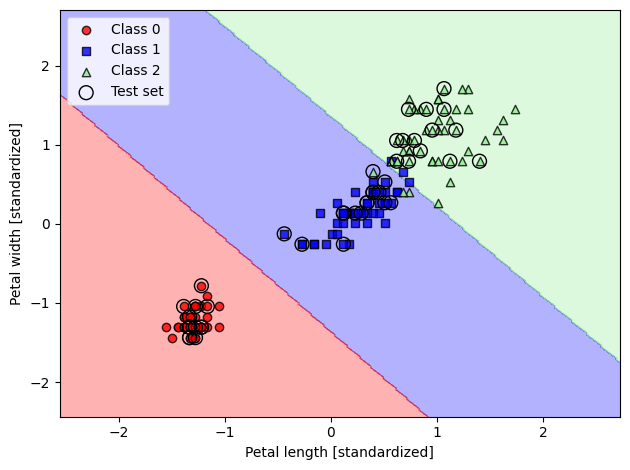

In [67]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Logistic regression versus SVMs**

In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs, which mostly care about the points that are closest to the decision boundary (support vectors). On the other hand, logistic regression has the advantage of being a simpler model and can be implemented more easily, and is mathematically easier to explain. Furthermore, logistic regression models can be easily updated, which is attractive when working with streaming data.

### Alternative implementations in scikit-learn

In [68]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Solving nonlinear problems using a kernel SVM

Another reason why `SVMs` enjoy high popularity among machine learning practitioners is that they can be easily kernelized to solve `nonlinear classification` problems. Before we discuss the main concept behind the so-called kernel SVM, the most common variant of SVMs, let’s first create a synthetic dataset to see what such a `nonlinear classification` problem may look like.

#### Kernel methods for linearly inseparable data

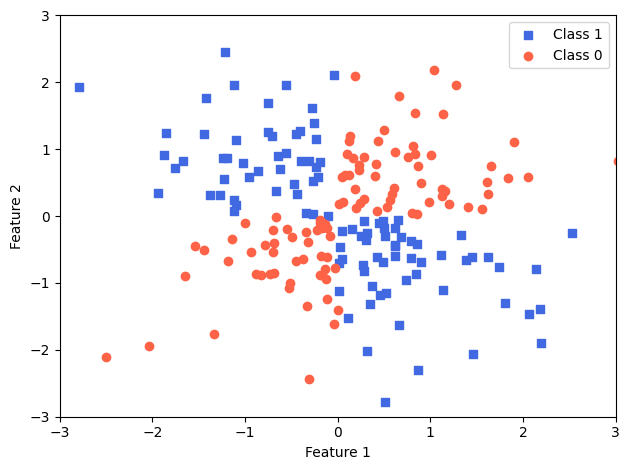

In [89]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')

plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(loc='best')
plt.tight_layout()
#plt.savefig('figures/03_12.png', dpi=300)
plt.show()

In [90]:
X_xor[y_xor == 1, 0]

array([ 1.62434536,  0.86540763,  1.74481176,  0.3190391 ,  1.46210794,
        1.13376944, -1.10061918,  0.90085595, -0.26788808, -1.11731035,
       -0.74715829,  0.05080775,  0.30017032, -0.20889423, -0.75439794,
        0.51292982,  0.48851815,  2.18557541,  0.31563495, -0.30620401,
       -0.67066229, -0.34385368, -0.62000084, -0.44712856, -1.09491185,
        0.74055645, -0.26621851, -1.37311732,  0.84616065,  0.35054598,
       -1.85798186, -1.19926803, -1.23005814,  0.79280687,  0.52057634,
        0.44136444,  0.01740941,  0.24879916,  0.49521132,  2.19069973,
       -0.64691669,  2.52832571,  0.04366899,  1.33145711,  0.68006984,
       -1.27255876,  0.28066508,  0.6590498 , -0.40087819, -0.56230543,
       -1.1191154 ,  1.11438298, -1.23685338,  0.62336218, -1.2197444 ,
       -1.67419581, -0.86131636,  0.61853913,  1.81053491, -2.793085  ,
        0.36633201,  0.42952614,  0.10622272,  0.79502609,  0.2764993 ,
       -1.44087602, -0.25417987, -1.11647002,  0.49233656, -0.95

In [91]:
X_xor[y_xor == 1, 1]

array([-0.61175641, -2.3015387 , -0.7612069 , -0.24937038, -2.06014071,
       -1.09989127,  1.14472371, -0.68372786,  0.53035547,  0.2344157 ,
        1.6924546 , -0.63699565, -0.35224985,  0.58662319,  1.25286816,
       -0.29809284, -0.07557171, -1.39649634, -2.02220122,  0.82797464,
        0.37756379,  0.04359686,  0.69803203,  1.2245077 ,  0.16938243,
       -0.9537006 ,  0.03261455,  0.31515939, -0.85951594, -1.31228341,
        1.23616403,  0.86334532,  0.5505375 , -0.62353073, -1.14434139,
       -0.10015523, -1.12201873, -0.29664115, -0.17470316, -1.89636092,
        0.90148689, -0.24863478, -0.22631424, -0.28730786, -0.3198016 ,
        0.31354772, -0.0731127 , -1.62743834,  0.82400562,  1.95487808,
        1.9560789 , -0.58652394,  0.87583893, -0.43495668,  2.44936865,
        0.82502982,  0.67471153, -0.44317193, -1.30572692,  1.93752881,
       -1.04458938, -0.6069984 , -1.52568032, -0.37443832, -0.7332716 ,
        1.23225307,  1.39984394,  0.0809271 , -0.68067814,  0.58

The basic idea behind `kernel methods` for dealing with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function, $\phi$, where the data becomes linearly separable. We can transform a two-dimensional dataset into a three-dimensional feature space, where the classes become separable via the following projection:

$$\phi(x_{1}, x_{2}) = (z_{1}, z_{2}, z_{3}) = (x_{1},x_{2},x_{1}^{2} + x_{2}^{2})$$

This allows us to separate the two classes shown in the plot via a linear hyperplane that becomes a nonlinear decision boundary if we project it back onto the original feature space.


![Classifying nonlinear data using kernel methods](./figures/kernel-methods-non-linear.png)


### Using the kernel trick to find separating hyperplanes in higher dimensional space

To solve a nonlinear problem using an SVM, we would transform the training data into a higher-dimensional feature space via a mapping function, $\phi$, and train a linear SVM model to classify the data in this new feature space. Then, we could use the same mapping function, $\phi$ , to transform new, unseen data to classify it using the linear SVM model.

## **Kernel Trick in Support Vector Machines (SVMs): A Detailed Explanation**

#### **1. Motivation: The Challenge of Nonlinear Data**

A **Support Vector Machine (SVM)** is fundamentally a **linear classifier**. It seeks to find a **hyperplane** that maximally separates data points of different classes in a given feature space.
However, real-world data is often **nonlinearly separable** — meaning that no straight line (in 2D) or flat hyperplane (in higher dimensions) can perfectly divide the data into distinct classes.

To solve this, we introduce the concept of **feature space transformation**.


#### **2. Feature Mapping: Transforming to a Higher-Dimensional Space**

Suppose we have a training dataset:

$`{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(m)}, y^{(m)}) }`$

where:

- each feature vector $`(x^{(i)} \in \mathbb{R}^n )`$ and 

- label $`( y^{(i)} \in {-1, +1} )`$.


We define a **mapping function**:

$`\phi: \mathbb{R}^n \rightarrow \mathbb{R}^N`$

that transforms the original feature vector $`(x^{(i)})`$ into a new, possibly **much higher-dimensional space**:


$`z^{(i)} = \phi(x^{(i)})`$


The hope is that in this new feature space, the transformed data becomes **linearly separable**, even if it wasn’t in the original space.



#### **3. The Problem with Explicit Mapping**

While the mapping $`(\phi(x))`$ helps handle nonlinear problems, it introduces a **computational burden**:

* For large $`(N)`$ (sometimes infinite), explicitly computing $`(\phi(x))`$ becomes **prohibitively expensive**.

* Memory and time complexity both increase drastically.

* For example, mapping 2D data to a 1000D polynomial space would require enormous computation.

Hence, we need a way to **benefit from this transformation** without ever computing $`(\phi(x))`$ explicitly.



#### **4. The Kernel Trick: Avoiding Explicit Computation**

The **kernel trick** allows training an SVM in the higher-dimensional space **without explicitly performing the transformation**.

When training an SVM, we do not need $`(\phi(x))`$ itself — we only need the **dot products** between pairs of transformed data points:


$`\phi(x^{(i)})^T \phi(x^{(j)})`$


The kernel trick replaces this dot product with a **kernel function** $`(K(x^{(i)}, x^{(j)}))`$:


$`K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T \phi(x^{(j)})`$


Thus, rather than mapping each data point into a high-dimensional space, we compute $`(K(x^{(i)}, x^{(j)}))`$ **directly in the original space** — saving both computation and memory.



#### **5. Interpreting the Kernel Function**

A **kernel** is a **similarity function** that measures how close or similar two data points are, according to some notion of similarity in the feature space.

* Large $`(K(x^{(i)}, x^{(j)}))`$ → The points are **similar** (close together).

* Small $`(K(x^{(i)}, x^{(j)}))`$ → The points are **dissimilar** (far apart).

The kernel allows the SVM to implicitly operate in a high-dimensional space while performing all computations in the original input space.



#### **6. Commonly Used Kernel Functions**

Several kernel functions are used in SVMs, depending on the nature of the data and problem type.

| **Kernel Name**                                   | **Definition**                                                | **Intuition**                                                       |
| ------------------------------------------------- | ------------------------------------------------------------- | ------------------------------------------------------------------- |
| **Linear Kernel**                                 | $`( K(x^{(i)}, x^{(j)}) = x^{(i)T} x^{(j)} )`$                   | No transformation; suitable for linearly separable data             |
| **Polynomial Kernel**                             | $`( K(x^{(i)}, x^{(j)}) = (x^{(i)T} x^{(j)} + c)^d )`$            | Maps data into a polynomial feature space of degree ( d )           |
| **Radial Basis Function (RBF) / Gaussian Kernel** | $`( K(x^{(i)}, x^{(j)}) = \exp(-\gamma \|x^{(i)} - x^{(j)}\|^2))`$ | Infinite-dimensional mapping; measures similarity based on distance |
| **Sigmoid Kernel**                                | $`( K(x^{(i)}, x^{(j)}) = \tanh(\alpha x^{(i)T} x^{(j)} + c) )`$  | Similar to neural network activation functions                      |



#### **7. The Radial Basis Function (RBF) Kernel in Detail**

The **RBF kernel** is the most widely used due to its **flexibility** and **ability to handle complex nonlinearities**.

It is defined as:


$`K(x^{(i)}, x^{(j)}) = \exp \left( -\frac{|x^{(i)} - x^{(j)}|^2}{2\sigma^2} \right)`$

where:

* $`( \|x^{(i)} - x^{(j)}\|^2 )`$ measures the **squared Euclidean distance** between two data points,

* $`( \sigma )`$ controls the **spread** (or width) of the Gaussian function.


This can also be written in a simplified form:

$`K(x^{(i)}, x^{(j)}) = \exp(-\gamma |x^{(i)} - x^{(j)}|^2)`$

where $`( \gamma = \frac{1}{2\sigma^2} )`$.



#### **8. Interpreting the RBF Kernel**

* If two data points are **identical** $`(( x^{(i)} = x^{(j)} ))`$, then $`( \|x^{(i)} - x^{(j)}\|^2 = 0 )`$, so:
  
  $`K(x^{(i)}, x^{(j)}) = e^0 = 1`$

  meaning **maximum similarity**.

* As the distance $`( \|x^{(i)} - x^{(j)}\| )`$ increases, the exponential term decreases rapidly towards 0, indicating **less similarity**.

Thus, the RBF kernel acts as a **localized similarity function**, where each data point has influence over a surrounding region defined by $`( \sigma )`$ (or equivalently, $`( \gamma )`$).

Roughly speaking, the term `“kernel”` can be interpreted as a `similarity function` between a pair of examples. The minus sign inverts the distance measure into a similarity score, and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar examples) and 0 (for very dissimilar examples).


#### **9. Role of γ (Gamma) Parameter**

The parameter $`( \gamma )`$ determines the **influence of a single training example**:

* **Large γ** → Narrow Gaussian → Each point has a **small influence region** → The model captures fine details (risk of overfitting).

* **Small γ** → Wide Gaussian → Each point influences a **large area** → The model becomes smoother (risk of underfitting).

Tuning $`( \gamma )`$ (and the regularization parameter ( C )) is essential for achieving optimal model performance.



#### **10. Geometric Intuition of the Kernel Trick**

In the original feature space, data may be **nonlinearly separable**.

However, when implicitly mapped into a **higher-dimensional space** using a kernel, the data becomes **linearly separable**.

For instance:

* A circle-shaped dataset in 2D cannot be separated by a line.

* When mapped to a higher-dimensional space (using an RBF kernel), the inner and outer points become separable by a **hyperplane** in that new space.

This allows SVMs to perform **nonlinear classification** using **linear decision boundaries** in a transformed (implicit) space.



#### **11. Summary**

| **Concept**              | **Explanation**                                                               |
| ------------------------ | ----------------------------------------------------------------------------- |
| **Goal**                 | Handle nonlinear separability using linear models in higher-dimensional space |
| **Mapping Function (φ)** | Transforms input data into a higher-dimensional space                         |
| **Problem**              | Explicit computation of φ(x) is expensive or infeasible                       |
| **Kernel Trick**         | Computes dot products in transformed space without explicit mapping           |
| **Kernel Function (K)**  | Represents similarity between two points in input space                       |
| **RBF Kernel**           | Most common; based on Euclidean distance; defines local similarity            |
| **γ (Gamma)**            | Controls the width of the Gaussian and complexity of the model                |



#### **12. Final Takeaway**

The **kernel trick** transforms SVMs from simple linear classifiers into powerful nonlinear learners without increasing computational cost excessively.
By replacing explicit mappings with **kernel evaluations**, SVMs can implicitly operate in high-dimensional (even infinite-dimensional) spaces while maintaining computational efficiency.

This ability to handle complex, nonlinear relationships in data while preserving a convex optimization structure is what makes **kernelized SVMs** one of the most elegant and theoretically sound algorithms in machine learning.

---


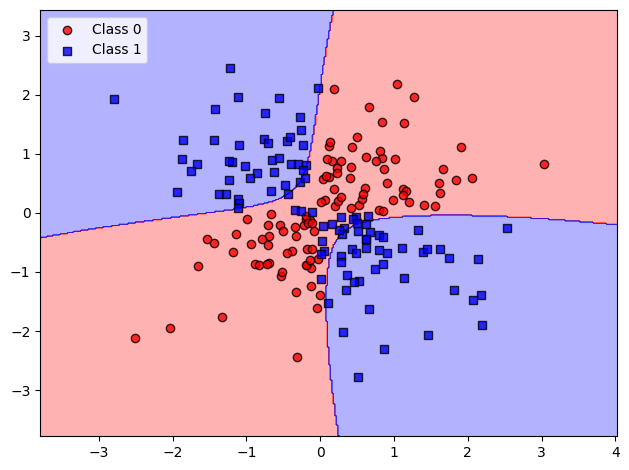

In [93]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, 
                      y_xor, 
                      classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The $\gamma$ parameter, which we set to `gamma=0.1`, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for $\gamma$, we increase the influence or reach of the training examples, which leads to a tighter and bumpier decision boundary. To get a better understanding of $\gamma$, let's apply an `RBF` kernel SVM to our Iris flower dataset:

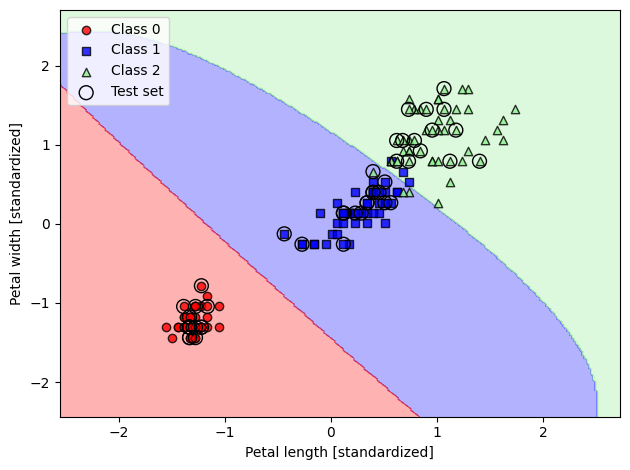

In [94]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_15.png', dpi=300)
plt.show()

- Now, let's increase the value of $\gamma$ and observe the effect on the decision boundary:

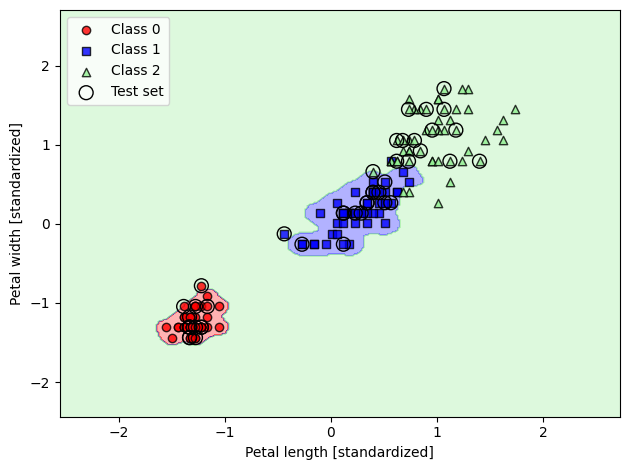

In [95]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_16.png', dpi=300)
plt.show()

- We can now see that the decision boundary around the classes `0` and `1` is much tighter using a relatively large value of $\gamma$.

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.93      0.93      0.93        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Confusion Matrix:
 [[14  0  1]
 [ 0 14  1]
 [ 0  1 14]]


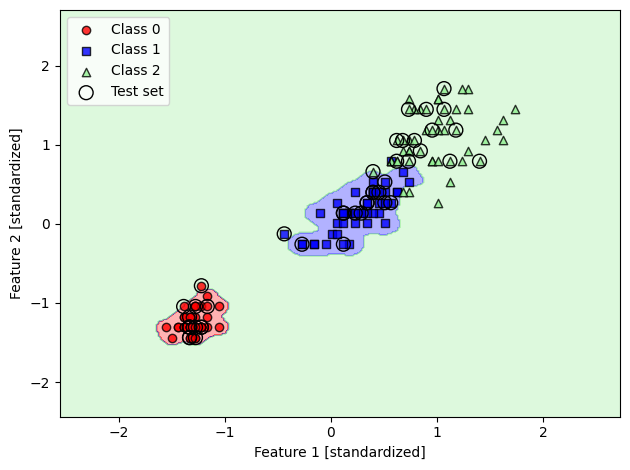

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Train the RBF Kernel SVM
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

# --- Make Predictions ---
y_pred = svm.predict(X_test_std)

# --- Evaluate Performance ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Plot Decision Regions ---
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Evaluation:**

- `accuracy_score()` → Measures the fraction of correctly classified examples.

- `classification_report()` → Provides precision, recall, and F1-score.

- `confusion_matrix()` → Shows the distribution of true vs. predicted labels.

Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the `𝛾` parameter also plays an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset.

## Decision tree learning

`Decision tree classifiers` are attractive models if we care about interpretability. As the name “decision tree” suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.


![An example of a decision tree](./figures/Decision-tree.png)

Based on the features in our training dataset, the decision tree model learns a series of questions to infer the class labels of the examples. Although the figure above illustrates the concept of a decision tree based on categorical variables, the same concept applies if our features are real numbers, like in the Iris dataset. For example, we could simply define a cut-off value along the `sepal width` feature axis and ask a binary question: `"Is the sepal width >= 2.8 cm?"`

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest `information gain (IG)`. In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the training examples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to `prune` the tree by setting a limit for the maximum depth of the tree. 


### **Decision Trees Algorithm**

#### **1. Introduction**

A **Decision Tree** is a **supervised learning algorithm** used for both **classification** and **regression** tasks.
It models decisions as a **tree structure**, where:

* **Internal nodes** represent feature tests (e.g., `x₁ < 5.2`)
* **Branches** represent the outcomes of those tests
* **Leaves** (terminal nodes) represent class labels or predicted values

Decision trees are **non-parametric**, meaning they don’t assume any prior distribution of data, making them versatile and easy to interpret.



#### **2. Conceptual Overview**

The algorithm recursively **partitions the dataset** into subsets based on feature values, forming a tree of decisions that lead to the target variable.

At each node:

* The algorithm selects the **feature and threshold** that result in the **best split**, i.e., the one that most effectively separates the target classes (for classification) or reduces variance (for regression).

This process continues until:

* A stopping criterion is met (e.g., maximum depth, minimum samples per leaf), or
* The node becomes **pure** (contains samples of only one class).



#### **3. Structure of a Decision Tree**

A decision tree is composed of:

| **Component**      | **Description**                                                                  |
| ------------------ | -------------------------------------------------------------------------------- |
| **Root Node**      | The topmost node representing the entire dataset.                                |
| **Internal Nodes** | Represent decision rules (feature-based splits).                                 |
| **Branches**       | Represent outcomes of feature tests.                                             |
| **Leaf Nodes**     | Terminal nodes that output a class label (classification) or value (regression). |



#### **4. Mathematical Foundation of Splitting**

At each step, the algorithm chooses the **best feature** and **best split point** to divide data into two or more subsets.

##### **4.1 Objective of the Split**

The goal is to **maximize the purity** of child nodes.

For a dataset (D) with target variable (y), splitting on feature (j) with threshold (t) gives subsets:


$$D_{\text{left}} = { (x, y) \in D : x_j \leq t }$$


$$D_{\text{right}} = { (x, y) \in D : x_j > t }$$

We choose $(j, t)$ that **maximizes the reduction in impurity**.



#### **5. Measures of Impurity (for Classification)**

These functions quantify how “mixed” or “impure” a node is.
A **pure node** (samples from one class only) has impurity = 0.

##### **5.1 Gini Impurity**

Used in **CART (Classification and Regression Trees)**:


$$\mathrm{Gini}(D) = 1 - \sum_{k=1}^{K} p_k^2$$

where $(p_k)$ is the proportion of samples belonging to class $(k)$.


* Range: [0, 0.5] for binary classes
* Lower value → higher purity

##### **5.2 Entropy (Information Gain)**

Used in **ID3** and **C4.5** algorithms:


$$\mathrm{Entropy}(D) = -\sum_{k=1}^{K} p_k \log_2(p_k)$$

Information Gain (IG) for a split:


$$\mathrm{IG}(D, j, t) = \mathrm{Entropy}(D) - \left( \frac{|D_{\text{left}}|}{|D|}\mathrm{Entropy}(D_{\text{left}}) + \frac{|D_{\text{right}}|}{|D|}\mathrm{Entropy}(D_{\text{right}}) \right)$$


The best split maximizes $`(\mathrm{IG})`$.


##### **5.3 Classification Error**


$$\mathrm{Error}(D) = 1 - \max_k (p_k)$$


Used mainly for evaluation, not splitting, because it’s less sensitive to node purity changes.



#### **6. Splitting Criterion for Regression**

For regression, impurity is measured by the **variance** of the target variable.


$$\mathrm{Var}(D) = \frac{1}{|D|} \sum_{i=1}^{|D|} (y_i - \bar{y})^2$$


The algorithm selects splits that **minimize the weighted variance** in child nodes:


$$\Delta \mathrm{Var} = \mathrm{Var}(D) - \left( \frac{|D_L|}{|D|} \mathrm{Var}(D_L) + \frac{|D_R|}{|D|} \mathrm{Var}(D_R) \right)$$



#### **7. Recursive Tree Construction (Top-Down Approach)**

**Algorithm Steps (CART-style):**

1. **Start** with all training samples at the root node.
2. For each feature $(j)$:

   * Test all possible split points $(t)$.
   * Compute impurity reduction $(\Delta I(j, t))$.
  
3. Choose the $(j, t)$ that gives **maximum impurity reduction**.
4. Split data into left and right subsets.
5. Repeat recursively for each subset until:

   * A stopping condition is met:

     * Maximum depth
     * Minimum number of samples
     * Impurity = 0



#### **8. Pruning: Preventing Overfitting**

Decision trees tend to **overfit**, learning noise in training data.
Pruning is used to reduce complexity.

##### **8.1 Pre-Pruning (Early Stopping)**

Stop tree growth early using hyperparameters:

* `max_depth`
* `min_samples_split`
* `min_samples_leaf`
* `max_leaf_nodes`

##### **8.2 Post-Pruning (Cost-Complexity Pruning)**

First, grow a full tree, then remove branches that provide little predictive power.
Use the **cost complexity function**:


$$R_\alpha(T) = R(T) + \alpha |T|$$


where:

* $(R(T))$: misclassification error of the tree,
* $(|T|)$: number of terminal nodes,
* $(\alpha)$: regularization parameter controlling pruning strength.



#### **9. Prediction Rules**

##### **9.1 Classification**

Each leaf node stores the majority class among training samples that reached it:

$$\hat{y} = \arg\max_k p_k$$


##### **9.2 Regression**

Each leaf node outputs the **mean** of the target values of samples in that node:

$$\hat{y} = \frac{1}{|D_{\text{leaf}}|} \sum_{i \in D_{\text{leaf}}} y_i$$



#### **10. Advantages and Disadvantages**

| **Advantages**                              | **Disadvantages**                                      |
| ------------------------------------------- | ------------------------------------------------------ |
| Easy to interpret and visualize             | Prone to overfitting                                   |
| No feature scaling required                 | Small data variations can change structure drastically |
| Handles both numerical and categorical data | Biased towards features with many levels               |
| Works for nonlinear relationships           | Less generalization compared to ensemble methods       |



#### **11. Important Hyperparameters (Scikit-learn)**

| **Parameter**       | **Description**                                   |
| ------------------- | ------------------------------------------------- |
| `criterion`         | Measure of split quality: `'gini'` or `'entropy'` |
| `max_depth`         | Maximum tree depth                                |
| `min_samples_split` | Minimum samples to split a node                   |
| `min_samples_leaf`  | Minimum samples in a leaf                         |
| `max_features`      | Number of features to consider when splitting     |
| `ccp_alpha`         | Complexity parameter for pruning                  |



#### **12. Visualization and Interpretability**

Decision trees can be visualized using:

```python
from sklearn import tree
tree.plot_tree(model, feature_names=features, filled=True)
```

This produces an interpretable flowchart showing feature thresholds and predicted classes at each node.



#### **13. Relation to Ensemble Methods**

While standalone decision trees are interpretable, they are **high-variance models**.
Ensemble methods like:

* **Random Forests** (bagging of trees)
* **Gradient Boosted Trees** (boosting of trees)

use multiple trees to reduce variance and bias, achieving **state-of-the-art performance** on structured/tabular data.



#### **14. Summary Table**

| **Aspect**           | **Classification Tree** | **Regression Tree**   |
| -------------------- | ----------------------- | --------------------- |
| **Split criterion**  | Gini, Entropy           | Variance reduction    |
| **Leaf output**      | Majority class          | Mean of target values |
| **Loss function**    | Misclassification rate  | Mean squared error    |
| **Objective**        | Maximize purity         | Minimize variance     |
| **Common algorithm** | CART                    | CART                  |



#### **15. Core Intuition**

A **Decision Tree** mimics human decision-making:

* It sequentially asks **questions about features**,
* Follows the corresponding **branches**,
* And finally arrives at a **decision (leaf)**.

By combining multiple trees in an ensemble, models gain stability, reduce overfitting, and achieve exceptional predictive power — forming the basis for modern algorithms such as **Random Forests, XGBoost, and LightGBM**.

---


---

## **Maximizing IG – getting the most bang for your buck**

### Overview

Maximizing **Information Gain (IG)** is the core local objective when building a decision tree: at each node the algorithm searches for the feature and split that *most reduces impurity* (i.e., gives the largest IG). This section expands the formulas, shows how IG is computed in practice (numeric example), contrasts the three common impurity measures (entropy, Gini, classification error), and covers practical/algorithmic considerations (continuous features, complexity, bias, pruning, and implementation notes).

### 1. Formal objective (binary split)

For a parent node $`D_p`$ and a candidate split that produces two child nodes $`D_{left}`$ and $`D_{right}`$, the information gain is:


$$IG(D_p, split) = I(D_p) - \frac{N_{left}}{N_p} I(D_{left}) - \frac{N_{right}}{N_p} I(D_{right})$$


where $`I(\cdot)`$ is the chosen impurity measure, $`N_p`$ is the number of samples at the parent, and $`N_{left}, N_{right}`$ are the counts in the child nodes. The algorithm picks the split that maximizes $`IG`$.


### 2. Common impurity measures (definitions)

* **Entropy (Information theoretic)**

  $`Entropy(t) = -\sum_{i=1}^{c} p(i|t)\,\log_2 p(i|t)`$

  where $`p(i|t)`$ is the fraction of examples of class $`i`$ at node $`t`$. Entropy ∈ $`[0, \log_2 c]`$; for binary classes max is 1.

* **Gini impurity (CART)**

  $`Gini(t) = 1 - \sum_{i=1}^{c} p(i|t)^2`$

  Interpretable as the probability of mislabel if assigning randomly following class proportions.

* **Classification error**

  $`Error(t) = 1 - \max_i p(i|t)`$

  Simpler and less sensitive; rarely used for split selection because it has low resolution.


### 3. Numeric example (step-by-step)

Parent node: 10 samples → 6 positives, 4 negatives. Consider a split giving:

* Left: 5 samples → 4 positives, 1 negative.
* Right: 5 samples → 2 positives, 3 negatives.

**Compute probabilities:**

* Parent: $`p_{+}=0.6,\; p_{-}=0.4`$
* Left: $`p_{+}=0.8,\; p_{-}=0.2`$
* Right: $`p_{+}=0.4,\; p_{-}=0.6`$

**Entropy:**

* $`Entropy_{parent} = -0.6\log_2 0.6 - 0.4\log_2 0.4 \approx 0.971`$
* $`Entropy_{left} \approx -0.8\log_2 0.8 - 0.2\log_2 0.2 \approx 0.722`$
* $`Entropy_{right} \approx -0.4\log_2 0.4 - 0.6\log_2 0.6 \approx 0.971`$

  Weighted child entropy:
  $`\frac{5}{10}\cdot0.722 + \frac{5}{10}\cdot0.971 = 0.8465`$

  $`IG_{entropy} = 0.971 - 0.8465 = 0.1245`$

**Gini:**

* $`Gini_{parent} = 1-(0.6^2+0.4^2) = 0.48`$
* $`Gini_{left} = 1-(0.8^2+0.2^2) = 0.32`$
* $`Gini_{right} = 0.48`$

  Weighted child Gini:
  $`\frac{5}{10}\cdot0.32 + \frac{5}{10}\cdot0.48 = 0.40`$

  $`IG_{gini} = 0.48 - 0.40 = 0.08`$

**Classification error:**

* $`Error_{parent} = 1 - 0.6 = 0.4`$
* $`Error_{left} = 1 - 0.8 = 0.2`$
* $`Error_{right} = 1 - 0.6 = 0.4`$

  Weighted child error:
  $`\frac{5}{10}\cdot0.2 + \frac{5}{10}\cdot0.4 = 0.3`$
  
  $`IG_{error} = 0.4 - 0.3 = 0.1`$

**Interpretation:** for this split entropy gives the largest IG (0.1245), then classification error (0.1), then Gini (0.08). Different impurity measures can rank candidate splits differently—entropy often more sensitive to changes in class proportions.


### 4. Practical computation for continuous features

For a continuous feature, candidate split thresholds are considered at midpoints between sorted unique feature values. Typical procedure:

1. Sort training samples by the feature value.
2. Consider thresholds at midpoints between consecutive distinct feature values.
3. For each threshold compute left/right counts and class proportions and then impurity and IG.
4. Choose threshold that maximizes IG.

This reduces the search from an infinite continuum to at most $`O(n)`$ thresholds per feature (where $`n`$ is number of samples).


### 5. Complexity considerations

Naïve complexity if re-sorting per node: $`O(n \log n)`$ per feature. With clever bookkeeping (sorting once per feature and scanning), split selection can be done in $`O(n)`$ per feature for a node. Overall tree-building complexity depends on tree depth and splits: roughly $`O(n_{features} \times n \log n)`$ globally for typical implementations, but this varies with implementation and pruning strategy.


### 6. Biases and remedies

* **Bias to features with many values:** IG (entropy or Gini) tends to prefer features that produce many small pure partitions (e.g., ID numbers).

  * Remedy: use **Gain Ratio** (C4.5) which normalizes IG by the intrinsic information (split info):
    $`GainRatio = \frac{IG}{SplitInfo}`$ where $`SplitInfo = -\sum_{j} \frac{N_j}{N_p} \log_2\left(\frac{N_j}{N_p}\right)`$.
* **Categorical features with high cardinality**: consider grouping rare categories, one-hot encoding carefully, or using techniques that penalize many-way splits.


### 7. Split type: binary vs multiway

Most libraries (scikit-learn, CART) use **binary splits** for simplicity and efficiency even for categorical variables (they convert multiway categorical splits into a binary partitioning problem). Multiway splits are possible but increase combinatorial search and can overfit.


### 8. Stopping criteria and pruning

To avoid overfitting, use:

* **Pre-pruning (early stopping)**: `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`.
* **Post-pruning (cost-complexity pruning)**: select subtree minimizing $`R_\alpha(T) = R(T) + \alpha |T|`$ (scikit-learn uses `ccp_alpha` for cost-complexity pruning).


### 9. Which impurity to choose?

* **Gini**: slightly faster to compute, often yields similar trees to entropy; default in scikit-learn (`criterion='gini'`).
* **Entropy**: theoretically linked to information theory and mutual information; sometimes more sensitive.
* **Classification error**: not recommended for split selection (too coarse), but useful for evaluation.


### 10. Implementation notes (scikit-learn)

* Choose `criterion='gini'` or `criterion='entropy'`.
* Use `max_depth`, `min_samples_leaf`, `min_samples_split` to regularize.
* Use `ccp_alpha` for post-pruning.
* Use `class_weight` to handle imbalanced datasets.
* For continuous features the estimator automatically considers thresholds (no extra work required).


### 11. Final practical tips (getting most bang for IG)

1. **Normalize expectations:** IG is a *local* greedy objective. Good global performance requires validation and pruning.
2. **Tune impurity + regularization together:** which impurity measure is best depends on data; pair it with `max_depth` and `min_samples_leaf`.
3. **Avoid blindly trusting IG:** verify splits on validation set; check for features with many categories and apply gain-ratio-style normalization if needed.
4. **Use ensembles for stability:** when variance is a concern, use Random Forests or Gradient Boosting (these aggregate many IG-driven splits and reduce overfitting).

---


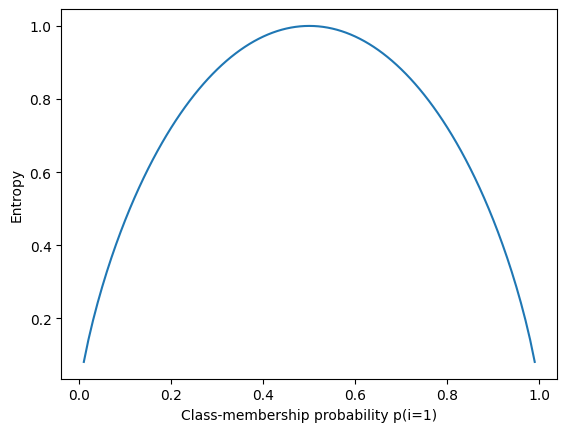

In [97]:
def entropy(p: float):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
plt.show()

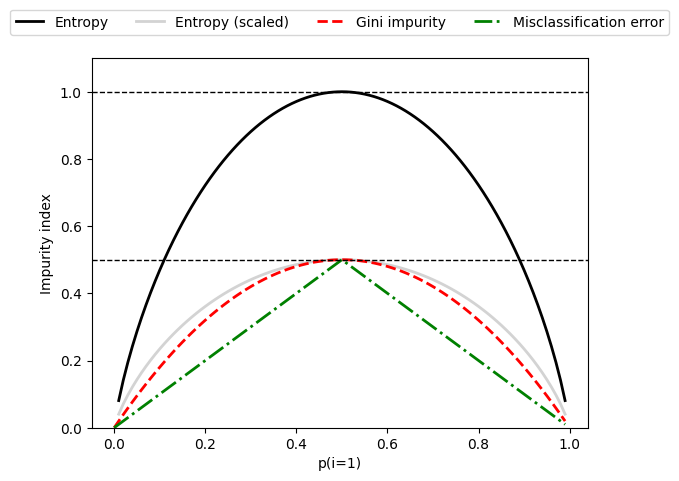

In [98]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
#plt.savefig('figures/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

**Building a decision tree**

Decision trees can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting. Using scikit-learn, we will now train a decision tree with a maximum depth of 4, using the Gini impurity as a criterion for impurity.


Although feature scaling may be desired for visualization purposes, note that feature scaling is not a requirement for decision tree algorithms. The code is as follows:

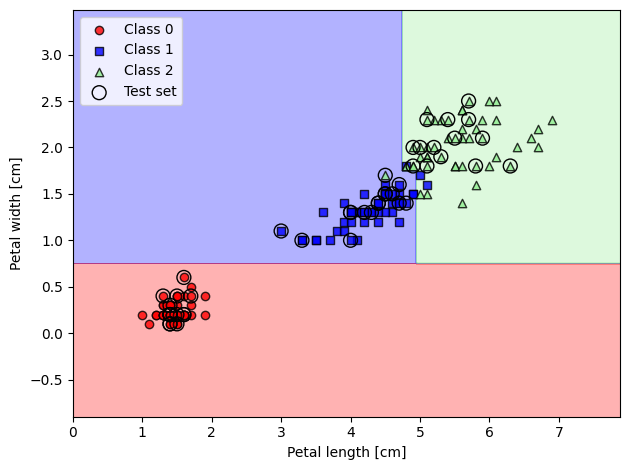

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=1,
)

tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

- A nice feature in scikit-learn is that it allows us to readily visualize the decision tree model after train-
ing via the following code:

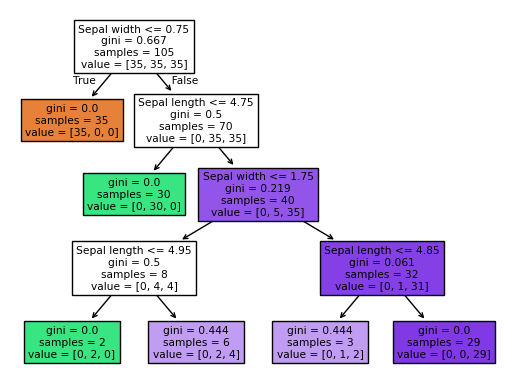

In [100]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']
tree.plot_tree(tree_model,
               feature_names=feature_names,
               filled=True)
plt.show()

Looking at the `decision tree` figure, we can now nicely trace back the splits that the decision tree determined from our training dataset. Regarding the feature splitting criterion at each node, note that the branches to the left correspond to “True” and branches to the right correspond to “False.”

Looking at the root node, it starts with `105` examples at the top. The first split uses a sepal width `cut-off ≤ 0.75 cm` for splitting the root node into two child nodes with `35 examples` (left child node) and `70 examples` (right child node). After the first split, we can see that the left child node is already pure and only contains examples from the `Iris-setosa` class (Gini impurity = 0). The further splits on the right are then used to separate the examples from the `Iris-versicolor` and `Iris-virginica` class.


Looking at this tree, and the decision region plot of the tree, we can see that the decision tree does a very good job of separating the flower classes.

---

## Combining multiple decision trees via random forests

### **Random Forest Algorithm**


#### **1. Overview**

Random Forest is an **ensemble learning algorithm** that combines multiple **Decision Trees** to form a more robust, accurate, and generalizable model. It belongs to the family of **bagging methods (Bootstrap Aggregating)**, where the goal is to reduce variance by averaging multiple models trained on different random samples of data.

Formally, a Random Forest is defined as:


$$\mathrm{RF}(x) = \frac{1}{B} \sum_{b=1}^{B} T_b(x)$$

where:

* $( B )$ = number of decision trees in the forest
* $( T_b(x) )$ = prediction made by the $( b^{th} )$ tree



#### **2. Motivation**

Decision Trees are powerful but prone to **overfitting** due to high variance. Random Forest mitigates this by:

* Training multiple trees on different **bootstrap samples** of the data.
* Introducing **feature randomness** during splitting, ensuring tree diversity.
* Aggregating predictions (by averaging for regression or majority voting for classification).

This ensemble effect leads to a **lower variance**, without increasing bias significantly.



#### **3. Building a Random Forest**

##### **Step 1: Bootstrap Sampling**

From the original dataset $(D)$ of size $(N)$, generate $(B)$ new datasets $(D_1, D_2, ..., D_B)$, each created by sampling $(N)$ examples *with replacement*.

Each tree $(T_b)$ is trained on one of these datasets.


This process is known as **bagging** (Bootstrap Aggregation).

##### **Step 2: Random Feature Selection at Splits**

At each node of every tree:

* Instead of considering all $(d)$ features, randomly select a subset of $(m)$ features $((m < d))$.

* Compute the best split only among these $(m)$ features.

This randomness ensures that individual trees are **less correlated**, improving ensemble diversity.


##### **Step 3: Tree Construction**

Each tree grows **fully** without pruning (unlike standard Decision Trees).
Each split is chosen to **maximize Information Gain (IG)**, **reduce Gini Impurity**, or **minimize entropy**—depending on the criterion.



#### **4. Prediction Mechanism**

##### **For Classification:**

Each tree votes for a class label. The Random Forest prediction is made by **majority voting**:


$$\hat{y} = \mathrm{mode}{ T_1(x), T_2(x), \dots, T_B(x) }$$

##### **For Regression:**

Each tree outputs a continuous value, and the Random Forest prediction is the **average**:


$$\hat{y} = \frac{1}{B} \sum_{b=1}^{B} T_b(x)$$



#### **5. Out-of-Bag (OOB) Error Estimation**

On average, about **63.2%** of training samples appear in each bootstrap dataset; the remaining **36.8%** are **Out-of-Bag (OOB)** samples.

The OOB samples serve as a **validation set** for evaluating model performance without needing an explicit test set.

The **OOB error** is computed as:


$$\mathrm{OOB\ Error} = \frac{1}{N} \sum_{i=1}^{N} I(y_i \neq \hat{y}_{\mathrm{OOB},i})$$


where ($ \hat{y}_{\mathrm{OOB},i} )$ is the aggregated prediction from trees that did *not* include sample $(i)$.



#### **6. Feature Importance in Random Forest**

Random Forest provides **feature importance scores** based on:


##### (a) **Mean Decrease in Impurity (MDI):**

Measures the total reduction in impurity (e.g., Gini or Entropy) contributed by each feature, averaged across all trees.


$$\mathrm{Importance}(f_j) = \frac{1}{B} \sum_{b=1}^{B} \sum_{t \in T_b: \mathrm{split\ on\ } f_j} \Delta I_t$$


where $(\Delta I_t)$ is the decrease in impurity at node $(t)$.


##### (b) **Mean Decrease in Accuracy (MDA):**

After training, the accuracy drop is measured when a feature’s values are **randomly permuted** in OOB samples.
A larger accuracy drop implies higher importance.



#### **7. Mathematical Intuition**

Each tree in the Random Forest is a **high-variance, low-bias** estimator.
When averaged, the ensemble achieves:


$$\mathrm{Var}(\hat{f}_{\mathrm{RF}}) = \rho \sigma^2 + \frac{(1 - \rho)\sigma^2}{B}$$

where:

* $(\sigma^2)$ = variance of individual trees
* $(\rho)$ = correlation between trees
* $(B)$ = number of trees

If trees are **uncorrelated** $((\rho \to 0))$ and numerous $((B \to \infty))$, the variance reduces significantly, yielding a more stable model.



#### **8. Advantages**

| Advantage                | Description                                             |
| ------------------------ | ------------------------------------------------------- |
| **Robustness**           | Resistant to overfitting due to averaging.              |
| **Nonlinearity**         | Captures complex relationships without feature scaling. |
| **Feature Importance**   | Provides interpretable importance metrics.              |
| **OOB Estimation**       | Allows internal model validation.                       |
| **Handles Missing Data** | Can maintain accuracy even with incomplete data.        |



#### **9. Limitations**

| Limitation             | Description                                                       |
| ---------------------- | ----------------------------------------------------------------- |
| **Less interpretable** | Harder to visualize than a single Decision Tree.                  |
| **Computational cost** | Training multiple trees can be slow for large datasets.           |
| **Correlated trees**   | If features are correlated, trees might not be fully independent. |
| **Memory intensive**   | Requires storing multiple trees.                                  |



#### **10. Extensions and Variants**

| Variant                                      | Description                                                                 |
| -------------------------------------------- | --------------------------------------------------------------------------- |
| **Extra Trees (Extremely Randomized Trees)** | Uses random split thresholds instead of best splits, increasing randomness. |
| **Random Forest Regressor/Classifier**       | Standard implementations for regression/classification tasks.               |
| **Weighted Random Forest**                   | Assigns different weights to trees or samples.                              |
| **Random Survival Forest**                   | Adapted for survival analysis problems.                                     |



#### **11. Practical Considerations**

* **Number of Trees (`n_estimators`)**: Higher values reduce variance but increase computation. Typical range: 100–500.
* **Max Features (`max_features`)**: Controls feature randomness; typical values are:

  * `sqrt(p)` for classification
  * `p/3` for regression
* **Max Depth**: Controls overfitting by limiting tree depth.
* **Bootstrap**: Can be disabled for deterministic behavior (`bootstrap=False`).



#### **12. Intuitive Summary**

Think of Random Forest as a **committee of Decision Trees**:

* Each member sees a different random subset of data and features.
* Each gives a “vote” on the prediction.
* The ensemble’s final decision is the **average or majority vote**—more stable and less prone to bias from individual trees.

---

Python(87988) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


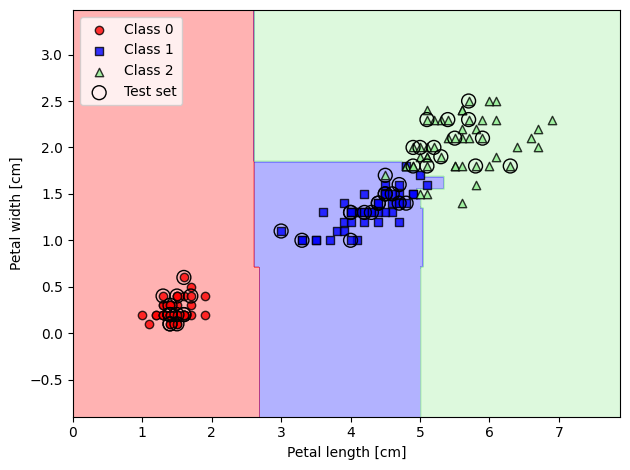

In [101]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Using the preceding code, we trained a random forest from `25 decision trees` via the `n_estimators` parameter. By default, it uses the `Gini impurity` measure as a criterion to split the nodes. Although we are growing a very small random forest from a very small training dataset, we used the `n_jobs parameter` for demonstration purposes, which allows us to parallelize the model training using multiple cores of our computer (here, two cores).

### K-nearest neighbors - a lazy learning algorithm


The last supervised learning algorithm that we want to discuss in this section is the `k-nearest neighbor (KNN) classifier`, which is particularly interesting because it is fundamentally different from the learning algorithms that we have discussed so far.

`KNN` is a typical example of a lazy learner. It is called `“lazy”` not because of its apparent simplicity, but because it doesn’t learn a discriminative function from the training data but memorizes the training dataset instead.

### **K-Nearest Neighbors (KNN) Algorithm**

#### **1. Overview**

K-Nearest Neighbors (KNN) is a **non-parametric**, **instance-based**, and **lazy learning** algorithm used for both **classification** and **regression** tasks.
It operates on the fundamental principle that **“similar data points exist in close proximity in feature space.”**

Formally, given a new sample, KNN:

1. Computes its **distance** to all points in the training dataset.
2. Selects the **K closest samples** (neighbors).
3. Makes a **prediction** based on the majority vote (for classification) or the average (for regression) of those neighbors.



### **2. Core Concept**

The KNN algorithm relies on the **distance metric** to determine how “close” data points are.
For a query sample $(x_q)$, KNN finds the set $(N_k(x_q))$ of its *k nearest neighbors* according to a distance function $(d(x_q, x_i))$, and predicts:

* **Classification:**
  
$$\hat{y} = \mathrm{argmax}*c \sum*{x_i \in N_k(x_q)} I(y_i = c)$$
  
  where $(I(\cdot))$ is an indicator function.

* **Regression:**
  
$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x_q)} y_i$$



#### **3. Distance Metrics**

The choice of distance metric directly affects KNN performance:

| Distance Metric    | Formula                                           | Description                                       |                    |                                                  |
| ------------------ | ------------------------------------------------- | ------------------------------------------------- | ------------------ | ------------------------------------------------ |
| **Euclidean**      | $`(d(x, y) = \sqrt{\sum_{j=1}^{d} (x_j - y_j)^2})`$ | Most common; assumes all features equally scaled. |                    |                                                  |
| **Manhattan (L1)** | $`(d(x, y) = \sum_{j=1}^{d}                        \| x_j - y_j                                         \| )`$                  | Suitable for grid-like or sparse data.           |
| **Minkowski**      | $`(d(x, y) = \left( \sum_{j=1}^{d}                 \| x_j - y_j                                         \| ^p \right)^{1/p} )`$ | General form (p=1 → Manhattan, p=2 → Euclidean). |
| **Cosine**         | $`(d(x, y) = 1 - \frac{x \cdot y}{\|x\| \|y\|} )`$       | Measures angular similarity between vectors.      |                    |                                                  |
| **Hamming**        | $`(d(x, y) = \sum_{j=1}^{d} [x_j \neq y_j] )`$       | For categorical features.                         |                    |                                                  |

> **Note:** Data scaling or normalization is crucial because KNN is distance-based—features with large ranges can dominate the metric.



#### **4. Algorithm Steps**

Given a dataset $`( D = {(x_i, y_i)}_{i=1}^N )`$ and a new input $(x_q)$:

1. **Compute Distance:**

   * Calculate the distance between $(x_q)$ and each $(x_i)$ in the training set.
2. **Sort Neighbors:**

   * Rank the distances in ascending order.
3. **Select K Nearest:**

   * Choose the top $(K)$ nearest neighbors.
4. **Aggregate Results:**

   * Classification → use majority vote.
   * Regression → use average or weighted average.
5. **Output Prediction:**

   * Return the predicted class or value.



#### **5. Weighted KNN**

In **weighted KNN**, closer neighbors are given higher influence:


$$\hat{y} = \mathrm{argmax}*c \sum*{x_i \in N_k(x_q)} w_i \cdot I(y_i = c)$$

where $`( w_i = \frac{1}{d(x_q, x_i) + \epsilon} )`$, with $`( \epsilon )`$ being a small constant to avoid division by zero.

This reduces the impact of distant neighbors, improving decision boundary smoothness.



#### **6. Choosing the Optimal K**

The parameter **K** controls the model’s bias-variance tradeoff:

| K Value           | Effect                                              | Bias | Variance |
| ----------------- | --------------------------------------------------- | ---- | -------- |
| Small (e.g., 1–3) | Model sensitive to noise; complex decision boundary | Low  | High     |
| Large (e.g., >15) | Smooth boundary, less noise-sensitive               | High | Low      |

Typically, **cross-validation** is used to choose an optimal K.



#### **7. KNN for Classification**

##### **Decision Boundary**

For binary classification, the KNN classifier divides the feature space into regions based on the majority class of neighbors. The resulting decision boundary is **nonlinear**, adapting to data distribution.

##### **Probability Estimation**

For class $(c)$:


$$P(y = c | x_q) = \frac{1}{k} \sum_{x_i \in N_k(x_q)} I(y_i = c)$$


The class with the highest estimated probability is chosen as the prediction.



#### **8. KNN for Regression**

For continuous targets, the predicted value is the **average** of the target values among K neighbors:


$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x_q)} y_i$$


Optionally, **distance-weighted regression** can be used:


$$\hat{y} = \frac{\sum_{x_i \in N_k(x_q)} \frac{y_i}{d(x_q, x_i)}}{\sum_{x_i \in N_k(x_q)} \frac{1}{d(x_q, x_i)}}$$




#### **9. Bias-Variance Tradeoff**

KNN exemplifies the **bias-variance tradeoff**:

* **Small K:**

  * Model adapts closely to data → low bias
  * Sensitive to noise → high variance
* **Large K:**

  * Model oversmooths boundaries → high bias
  * Less sensitive to noise → low variance

Finding the right K is about balancing these two forces.



#### **10. Computational Considerations**

| Challenge                   | Description                                                                                       |
| --------------------------- | ------------------------------------------------------------------------------------------------- |
| **High computational cost** | KNN requires computing distances to *all* training points during inference → ( O(Nd) ) per query. |
| **Memory-intensive**        | Must store entire training data.                                                                  |
| **Curse of dimensionality** | In high dimensions, distances become less informative, reducing accuracy.                         |
| **Optimization methods**    | KD-Trees or Ball Trees can accelerate nearest-neighbor searches.                                  |



#### **11. Curse of Dimensionality**

As the number of features ( d ) increases:

* Points become **equidistant**, making distance metrics lose discriminative power.
* The volume of the feature space grows exponentially → sparse data → poor generalization.

Mitigation techniques:

* **Dimensionality reduction (PCA, t-SNE, UMAP)**
* **Feature selection or scaling**



#### **12. Advantages**

| Advantage                | Description                                                   |
| ------------------------ | ------------------------------------------------------------- |
| **Simple and intuitive** | Easy to implement and understand.                             |
| **No training time**     | Model learns lazily — computation deferred until prediction.  |
| **Non-parametric**       | No assumption about data distribution.                        |
| **Flexible**             | Works for classification, regression, and density estimation. |



#### **13. Limitations**

| Limitation                           | Description                                                |
| ------------------------------------ | ---------------------------------------------------------- |
| **Slow at inference**                | Requires full dataset search for each prediction.          |
| **Sensitive to scale**               | Features with larger ranges dominate distance computation. |
| **Not suitable for high dimensions** | Suffers from the curse of dimensionality.                  |
| **Memory-intensive**                 | Stores all training data points.                           |



#### **14. Improvements and Variants**

| Variant                   | Description                                                            |
| ------------------------- | ---------------------------------------------------------------------- |
| **Weighted KNN**          | Closer neighbors have more influence.                                  |
| **Fuzzy KNN**             | Assigns probabilistic class memberships.                               |
| **Condensed/Edited KNN**  | Reduces training set to improve efficiency.                            |
| **Approximate KNN (ANN)** | Uses heuristics (e.g., locality-sensitive hashing) for large datasets. |
| **KMeans + KNN hybrid**   | Clusters data first, then applies KNN within clusters.                 |



#### **15. Geometric and Statistical Intuition**

KNN can be viewed as estimating the **posterior probability** using **local averaging**:


$$P(y = c | x_q) \approx \frac{\text{# of samples with class } c \text{ in } N_k(x_q)}{k}$$

This makes KNN a **non-parametric density estimator**, closely related to **Parzen Window estimation**.



#### **16. Mathematical Perspective**

KNN estimates the class conditional probability density as:


$$p(y = c | x_q) = \frac{p(x_q | y = c) p(y = c)}{p(x_q)}$$

Given $`( p(x_q | y = c) )`$ approximated by neighbor density:


$$p(x_q | y = c) \approx \frac{k_c / n_c}{V}$$


where:

* $( k_c )$ = number of class $( c )$ samples among K neighbors
* $( n_c )$ = total samples of class ( c )
* $( V )$ = volume enclosing the K neighbors

Thus, KNN acts as a **local Bayesian estimator**, using neighborhood counts as density approximations.



#### **17. Practical Tips**

* Always **normalize or standardize** features.
* Use **cross-validation** to tune K.
* Use **KDTree** or **BallTree** for large datasets.
* Combine with **dimensionality reduction** for high-dimensional data.



#### **18. Summary**

| Concept                 | Insight                                                  |
| ----------------------- | -------------------------------------------------------- |
| **Nature**              | Non-parametric, instance-based, lazy learner             |
| **Core Principle**      | Predictions based on similarity (proximity)              |
| **Main Hyperparameter** | K (number of neighbors)                                  |
| **Distance Metrics**    | Euclidean, Manhattan, Cosine, etc.                       |
| **Strength**            | Simple, interpretable, effective for well-separated data |
| **Weakness**            | Slow inference, high-dimensional inefficiency            |

---


![KNN](./figures/KNN.png)

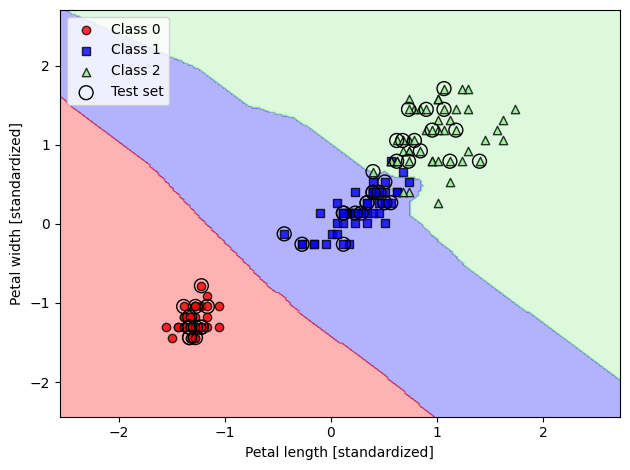

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           metric='minkowski')

knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_24_figures.png', dpi=300)
plt.show()

Lastly, it is important to mention that KNN is very susceptible to overfitting due to the `curse of dimensionality`. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. We can think of even the closest neighbors as being too far away in a high-dimensional space to give a good estimate.

We discussed the concept of regularization in the section about logistic regression as one way to avoid overfitting. However, in models where regularization is not applicable, such as decision trees and KNN, we can use feature selection and dimensionality reduction techniques to help us to avoid the curse of dimensionality. 

**Curse of Dimensionality in K-Nearest Neighbors (KNN)**


### **1. Definition**

The **curse of dimensionality** refers to various phenomena that arise when analyzing and organizing data in **high-dimensional spaces** that do not occur in low-dimensional settings.

In the context of **KNN**, it describes how increasing the number of features (dimensions) can **degrade the algorithm’s performance**, making distance-based similarity measures less meaningful.



### **2. Why It Happens**

KNN relies on **distance metrics** (usually Euclidean distance) to determine the "closeness" between data points.

In high dimensions:

* Points become increasingly **equidistant** from each other.
* The **volume** of the space grows exponentially, so data becomes sparse.
* The concept of **neighborhood** loses its meaning.

Formally, in a $d$-dimensional unit hypercube, the fraction of volume within a distance $r$ of the center is:

$`V(r) = r^d`$

As $d$ increases, $V(r)$ shrinks rapidly, meaning we need exponentially more data to cover the same relative space.



### **3. Mathematical Illustration**

Let $x_i$ be a point and let’s compare the ratio of distances between the **closest** and **farthest** neighbors as dimension $d$ increases.

If distances follow a uniform distribution:

$$\mathrm{E}[D_{max}] - \mathrm{E}[D_{min}] \to 0 \quad \text{as} \quad d \to \infty$$

That means:

* All points appear roughly at the **same distance** from each other.
* KNN cannot effectively distinguish between “near” and “far” neighbors.



### **4. Effects on KNN**

| Issue                           | Explanation                                                        |
| ------------------------------- | ------------------------------------------------------------------ |
| **Distance uniformity**         | Euclidean distances converge, reducing contrast between neighbors. |
| **Increased noise sensitivity** | Sparse data leads to unstable neighbor selection.                  |
| **Computation cost**            | Distance calculation in high dimensions becomes expensive.         |
| **Overfitting risk**            | Model becomes overly sensitive to local noise in sparse regions.   |



### **5. Mitigation Strategies**

| Strategy                     | Description                                                                             |
| ---------------------------- | --------------------------------------------------------------------------------------- |
| **Dimensionality Reduction** | Use PCA, LDA, or Autoencoders to project data into a lower-dimensional manifold.        |
| **Feature Selection**        | Retain only the most informative features through statistical or model-based selection. |
| **Distance Metric Learning** | Learn a weighted or Mahalanobis distance that better reflects similarity.               |
| **Regularization**           | Add constraints or thresholds on the number of neighbors or distances.                  |
| **Standardization**          | Scale features to prevent dominance by variables with larger ranges.                    |



### **6. Example Insight**

Consider a dataset with 10 features (dimensions).
To ensure that the **nearest neighbor** is within 10% of the range of the farthest point, we might need over **100× more data** compared to a 2D space.

Thus, as the dimensionality increases, the **data density** decreases exponentially, leading to **poor generalization** in KNN.



### **7. Key Takeaway**

The **curse of dimensionality** makes distance-based algorithms like KNN:

* Computationally inefficient
* Statistically unreliable in high-dimensional spaces

Hence, **dimensionality reduction** and **feature engineering** are crucial preprocessing steps before applying KNN in high-dimensional datasets.

---
